In [15]:
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *

import matplotlib.pyplot as plt

# encoders and decoders
linreg = RegressionLine(16)

# fetch data
data = DataFetcher(["GLD.US"], limit=400)

print(data.fetch_data().tail())
print(len(data.get_dataframe()))


            GLD.US.Open  GLD.US.High  GLD.US.Low  GLD.US.Close  GLD.US.Volume
Date                                                                         
2018-12-10       117.70       117.94     117.420        117.68        8118110
2018-12-11       117.67       117.89     117.350        117.54        6395391
2018-12-12       117.70       117.95     117.612        117.79        4136781
2018-12-13       117.54       117.62     117.260        117.53        4131770
2018-12-14       116.63       117.30     116.580        117.06        7501660
400


In [16]:
model_data = DataGenerator(data.get_dataframe(), 
                           {"^trigonometric": identity, 
                            "(Open|High|Low|Close)$": linreg.encode_decode}, 
                           {"GLD.US.Close$": linreg.encode_decode},
                           aggregation_window_size=16, batch_size=10, 
                           training_percentage=0.8,
                           model_filename="/tmp/keras-red-green-1.h5")
print(model_data.get_df_columns())
print("feature shape:", model_data.batch_feature_shape)
print("labels shape:", model_data.batch_label_shape)
print("train/test data:", len(model_data), len(model_data.as_test_data_generator()))
model_data.features, model_data.labels


['GLD.US.Open', 'GLD.US.High', 'GLD.US.Low', 'GLD.US.Close', 'GLD.US.Volume', 'GLD.US.Open_variance', 'GLD.US.High_variance', 'GLD.US.Low_variance', 'GLD.US.Close_variance', 'GLD.US.Volume_variance', 'trigonometric_time.cos_dow', 'trigonometric_time.sin_dow', 'trigonometric_time.cos_woy', 'trigonometric_time.sin_woy', 'trigonometric_time.cos_doy', 'trigonometric_time.sin_doy', 'trigonometric_time.sin_yer', 'trigonometric_time.cos_yer', 'trigonometric_time.sin_dec', 'trigonometric_time.cos_dec']
feature shape: (10, 260, 224)
labels shape: (10, 16)


train/test data: 81 20


([('GLD.US.Open',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7ff405367fd0>>),
  ('GLD.US.High',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7ff405367fd0>>),
  ('GLD.US.Low',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7ff405367fd0>>),
  ('GLD.US.Close',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7ff405367fd0>>),
  ('trigonometric_time.cos_dow',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.sin_dow',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.cos_woy',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.sin_woy',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.cos_doy',
   <function timeseries_ml_utils.encoders.identity>),
 

Epoch 1/1


 1/81 [..............................] - ETA: 10:11 - loss: 0.0106 - mean_absolute_error: 0.0839 - acc: 0.0000e+00

 2/81 [..............................] - ETA: 5:12 - loss: 0.0073 - mean_absolute_error: 0.0648 - acc: 0.0000e+00 

 3/81 [>.............................] - ETA: 3:33 - loss: 0.0059 - mean_absolute_error: 0.0584 - acc: 0.0000e+00

 4/81 [>.............................] - ETA: 2:46 - loss: 0.0051 - mean_absolute_error: 0.0537 - acc: 0.0000e+00

 5/81 [>.............................] - ETA: 2:17 - loss: 0.0046 - mean_absolute_error: 0.0501 - acc: 0.0000e+00

 6/81 [=>............................] - ETA: 1:58 - loss: 0.0042 - mean_absolute_error: 0.0467 - acc: 0.0000e+00

 7/81 [=>............................] - ETA: 1:45 - loss: 0.0038 - mean_absolute_error: 0.0435 - acc: 0.0000e+00

 8/81 [=>............................] - ETA: 1:34 - loss: 0.0035 - mean_absolute_error: 0.0407 - acc: 0.0000e+00

 9/81 [==>...........................] - ETA: 1:26 - loss: 0.0032 - mean_absolute_error: 0.0386 - acc: 0.0889    

10/81 [==>...........................] - ETA: 1:19 - loss: 0.0030 - mean_absolute_error: 0.0370 - acc: 0.1100

11/81 [===>..........................] - ETA: 1:14 - loss: 0.0028 - mean_absolute_error: 0.0357 - acc: 0.1091

12/81 [===>..........................] - ETA: 1:09 - loss: 0.0027 - mean_absolute_error: 0.0346 - acc: 0.1000

13/81 [===>..........................] - ETA: 1:05 - loss: 0.0025 - mean_absolute_error: 0.0336 - acc: 0.0923

14/81 [====>.........................] - ETA: 1:02 - loss: 0.0024 - mean_absolute_error: 0.0327 - acc: 0.0857

15/81 [====>.........................] - ETA: 58s - loss: 0.0022 - mean_absolute_error: 0.0319 - acc: 0.0867 

16/81 [====>.........................] - ETA: 56s - loss: 0.0021 - mean_absolute_error: 0.0309 - acc: 0.0813

17/81 [=====>........................] - ETA: 54s - loss: 0.0020 - mean_absolute_error: 0.0300 - acc: 0.0765

18/81 [=====>........................] - ETA: 51s - loss: 0.0019 - mean_absolute_error: 0.0292 - acc: 0.0722

19/81 [======>.......................] - ETA: 49s - loss: 0.0019 - mean_absolute_error: 0.0284 - acc: 0.0684

20/81 [======>.......................] - ETA: 47s - loss: 0.0018 - mean_absolute_error: 0.0277 - acc: 0.0650

21/81 [======>.......................] - ETA: 46s - loss: 0.0017 - mean_absolute_error: 0.0270 - acc: 0.0619

22/81 [=======>......................] - ETA: 44s - loss: 0.0017 - mean_absolute_error: 0.0264 - acc: 0.0591

23/81 [=======>......................] - ETA: 42s - loss: 0.0016 - mean_absolute_error: 0.0257 - acc: 0.0565

24/81 [=======>......................] - ETA: 41s - loss: 0.0016 - mean_absolute_error: 0.0252 - acc: 0.0542

25/81 [========>.....................] - ETA: 39s - loss: 0.0015 - mean_absolute_error: 0.0246 - acc: 0.0520

26/81 [========>.....................] - ETA: 38s - loss: 0.0015 - mean_absolute_error: 0.0242 - acc: 0.0500

27/81 [=========>....................] - ETA: 37s - loss: 0.0014 - mean_absolute_error: 0.0238 - acc: 0.0481

28/81 [=========>....................] - ETA: 36s - loss: 0.0014 - mean_absolute_error: 0.0235 - acc: 0.0464

29/81 [=========>....................] - ETA: 35s - loss: 0.0014 - mean_absolute_error: 0.0232 - acc: 0.0448

30/81 [==========>...................] - ETA: 33s - loss: 0.0015 - mean_absolute_error: 0.0230 - acc: 0.0433

31/81 [==========>...................] - ETA: 32s - loss: 0.0015 - mean_absolute_error: 0.0228 - acc: 0.0484

32/81 [==========>...................] - ETA: 31s - loss: 0.0015 - mean_absolute_error: 0.0227 - acc: 0.0594

33/81 [===========>..................] - ETA: 30s - loss: 0.0016 - mean_absolute_error: 0.0226 - acc: 0.0697

34/81 [===========>..................] - ETA: 30s - loss: 0.0016 - mean_absolute_error: 0.0226 - acc: 0.0735

35/81 [===========>..................] - ETA: 29s - loss: 0.0017 - mean_absolute_error: 0.0227 - acc: 0.0714

36/81 [============>.................] - ETA: 28s - loss: 0.0017 - mean_absolute_error: 0.0227 - acc: 0.0694

37/81 [============>.................] - ETA: 27s - loss: 0.0017 - mean_absolute_error: 0.0226 - acc: 0.0676

38/81 [=============>................] - ETA: 26s - loss: 0.0017 - mean_absolute_error: 0.0226 - acc: 0.0658

39/81 [=============>................] - ETA: 25s - loss: 0.0017 - mean_absolute_error: 0.0226 - acc: 0.0641

40/81 [=============>................] - ETA: 24s - loss: 0.0017 - mean_absolute_error: 0.0225 - acc: 0.0625

41/81 [==============>...............] - ETA: 24s - loss: 0.0017 - mean_absolute_error: 0.0224 - acc: 0.0610

42/81 [==============>...............] - ETA: 23s - loss: 0.0016 - mean_absolute_error: 0.0223 - acc: 0.0595

43/81 [==============>...............] - ETA: 22s - loss: 0.0016 - mean_absolute_error: 0.0222 - acc: 0.0581

44/81 [===============>..............] - ETA: 21s - loss: 0.0016 - mean_absolute_error: 0.0220 - acc: 0.0568

45/81 [===============>..............] - ETA: 21s - loss: 0.0016 - mean_absolute_error: 0.0219 - acc: 0.0556

46/81 [================>.............] - ETA: 20s - loss: 0.0015 - mean_absolute_error: 0.0217 - acc: 0.0652

47/81 [================>.............] - ETA: 19s - loss: 0.0015 - mean_absolute_error: 0.0215 - acc: 0.0745

48/81 [================>.............] - ETA: 19s - loss: 0.0015 - mean_absolute_error: 0.0213 - acc: 0.0833

49/81 [=================>............] - ETA: 18s - loss: 0.0015 - mean_absolute_error: 0.0211 - acc: 0.0918

50/81 [=================>............] - ETA: 17s - loss: 0.0014 - mean_absolute_error: 0.0209 - acc: 0.0960

51/81 [=================>............] - ETA: 17s - loss: 0.0014 - mean_absolute_error: 0.0208 - acc: 0.0941

52/81 [==================>...........] - ETA: 16s - loss: 0.0014 - mean_absolute_error: 0.0206 - acc: 0.0923

53/81 [==================>...........] - ETA: 15s - loss: 0.0014 - mean_absolute_error: 0.0204 - acc: 0.0906

54/81 [===================>..........] - ETA: 15s - loss: 0.0013 - mean_absolute_error: 0.0202 - acc: 0.0907

55/81 [===================>..........] - ETA: 14s - loss: 0.0013 - mean_absolute_error: 0.0201 - acc: 0.0891

56/81 [===================>..........] - ETA: 13s - loss: 0.0013 - mean_absolute_error: 0.0199 - acc: 0.0875

57/81 [====================>.........] - ETA: 13s - loss: 0.0013 - mean_absolute_error: 0.0197 - acc: 0.0877

58/81 [====================>.........] - ETA: 12s - loss: 0.0013 - mean_absolute_error: 0.0196 - acc: 0.0879

59/81 [====================>.........] - ETA: 12s - loss: 0.0013 - mean_absolute_error: 0.0194 - acc: 0.0864

60/81 [=====================>........] - ETA: 11s - loss: 0.0012 - mean_absolute_error: 0.0193 - acc: 0.0850

61/81 [=====================>........] - ETA: 10s - loss: 0.0012 - mean_absolute_error: 0.0191 - acc: 0.0836

62/81 [=====================>........] - ETA: 10s - loss: 0.0012 - mean_absolute_error: 0.0190 - acc: 0.0839

63/81 [======================>.......] - ETA: 9s - loss: 0.0012 - mean_absolute_error: 0.0189 - acc: 0.0825 

64/81 [======================>.......] - ETA: 9s - loss: 0.0012 - mean_absolute_error: 0.0188 - acc: 0.0813

65/81 [=======================>......] - ETA: 8s - loss: 0.0013 - mean_absolute_error: 0.0188 - acc: 0.0954

66/81 [=======================>......] - ETA: 8s - loss: 0.0013 - mean_absolute_error: 0.0187 - acc: 0.1091

67/81 [=======================>......] - ETA: 7s - loss: 0.0013 - mean_absolute_error: 0.0187 - acc: 0.1224

68/81 [========================>.....] - ETA: 6s - loss: 0.0013 - mean_absolute_error: 0.0187 - acc: 0.1353

69/81 [========================>.....] - ETA: 6s - loss: 0.0013 - mean_absolute_error: 0.0188 - acc: 0.1478

70/81 [========================>.....] - ETA: 5s - loss: 0.0013 - mean_absolute_error: 0.0188 - acc: 0.1600

71/81 [=========================>....] - ETA: 5s - loss: 0.0013 - mean_absolute_error: 0.0189 - acc: 0.1718

72/81 [=========================>....] - ETA: 4s - loss: 0.0013 - mean_absolute_error: 0.0189 - acc: 0.1833

73/81 [==========================>...] - ETA: 4s - loss: 0.0013 - mean_absolute_error: 0.0190 - acc: 0.1945

74/81 [==========================>...] - ETA: 3s - loss: 0.0013 - mean_absolute_error: 0.0191 - acc: 0.2054

75/81 [==========================>...] - ETA: 3s - loss: 0.0013 - mean_absolute_error: 0.0191 - acc: 0.2160

76/81 [===========================>..] - ETA: 2s - loss: 0.0013 - mean_absolute_error: 0.0192 - acc: 0.2263

77/81 [===========================>..] - ETA: 2s - loss: 0.0013 - mean_absolute_error: 0.0192 - acc: 0.2351

78/81 [===========================>..] - ETA: 1s - loss: 0.0013 - mean_absolute_error: 0.0193 - acc: 0.2423

79/81 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0193 - acc: 0.2481

80/81 [============================>.] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0193 - acc: 0.2525

Epoch 1/1


81/81 [==============================] - 47s 577ms/step - loss: 0.0014 - mean_absolute_error: 0.0193 - acc: 0.2556 - val_loss: 0.0022 - val_mean_absolute_error: 0.0199 - val_acc: 0.4000


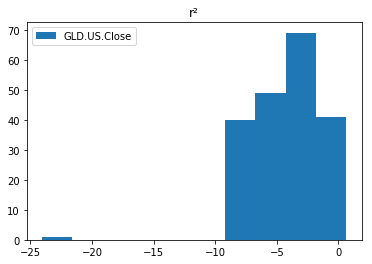

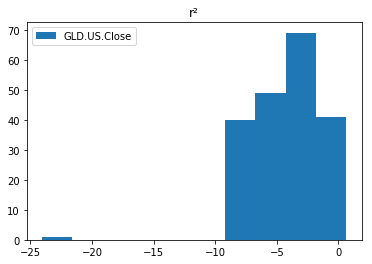

In [17]:

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=True))

model.add(LSTM(model_data.batch_label_shape[-1] * 2,
               name="LSTM-Layer-2",
               activation='tanh',
               dropout=0.01,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=True))

model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-3",
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False,
              "verbose": 1}

fit = model_data.fit(model, train_args, frequency=10, relative_accuracy_function=r_square, log_dir="/tmp/foo.123/")
fit["back_test"].plot_hist()

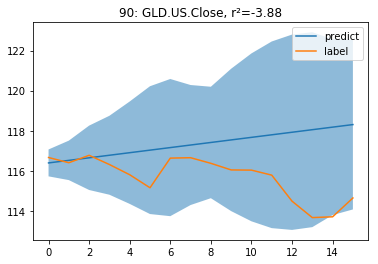

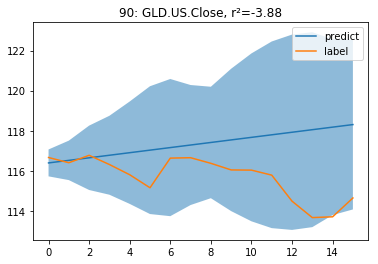

In [18]:
fit["back_test"].plot_random_sample()


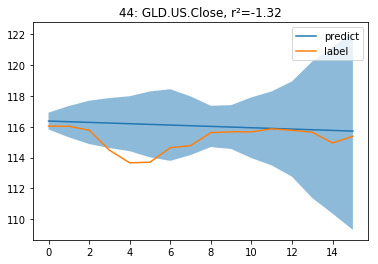

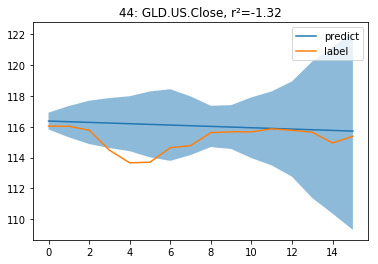

In [17]:
backtest.plot_random_sample()
# backtest.plot_hist()